In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

walmart_stores = pd.read_csv("1962_2006_walmart_store_openings.csv",parse_dates=['date_super']).dropna
walmart_stores

/var/folders/vl/z6gfc_1s4mbd9k5knjb6qm1c0000gn/T/ipykernel_39891/2629096730.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  walmart_stores = pd.read_csv("1962_2006_walmart_store_openings.csv",parse_dates=['date_super']).dropna


<bound method DataFrame.dropna of       storenum OPENDATE date_super  conversion  st  county  \
0            1   7/1/62 1997-03-01         1.0   5       7   
1            2   8/1/64 1996-03-01         1.0   5       9   
2            4   8/1/65 2002-03-01         1.0   5       7   
3            8  10/1/67 1993-03-01         1.0   5      29   
4            7  10/1/67        NaT         NaN   5     119   
...        ...      ...        ...         ...  ..     ...   
2987      5403  1/27/06 2006-01-27         0.0  17      19   
2988      3347  1/23/06 2006-01-23         0.0  12     105   
2989      5485  1/27/06        NaT         NaN  17      31   
2990      3425  1/27/06 2006-01-27         0.0  48     201   
2991      5193  1/31/06        NaT         NaN   6      65   

                     STREETADDR            STRCITY STRSTATE  ZIPCODE  \
0              2110 WEST WALNUT             Rogers       AR    72756   
1              1417 HWY 62/65 N           Harrison       AR    72601   
2    

In [3]:
walmart_stores = pd.read_csv('1962_2006_walmart_store_openings.csv',
                   parse_dates=['date_super']).dropna()
walmart_stores

/var/folders/vl/z6gfc_1s4mbd9k5knjb6qm1c0000gn/T/ipykernel_39891/843469491.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  walmart_stores = pd.read_csv('1962_2006_walmart_store_openings.csv',


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
5,10,7/1/68,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,5346,1/23/06,2006-01-23,0.0,37,1,1318 Mebane Oaks Rd,Mebane,NC,27302,Supercenter,36.111449,-79.27142,1,23,2006
2986,5313,1/23/06,2006-01-23,0.0,29,183,6100 Ronald Reagan Blvd,Lake Saint Louis,MO,63367,Supercenter,38.796601,-90.78525,1,23,2006
2987,5403,1/27/06,2006-01-27,0.0,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006
2988,3347,1/23/06,2006-01-23,0.0,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006


In [4]:
walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count")\
                        .rename(columns={"storenum": "store_count"})
walmart_store_count

,store_count
YEAR,
1962,1
1964,1
1965,1
1967,1
1968,5
1969,4
1970,4
1971,14
1972,13


In [5]:
walmart_stores.columns

Index(['storenum', 'OPENDATE', 'date_super', 'conversion', 'st', 'county',
       'STREETADDR', 'STRCITY', 'STRSTATE', 'ZIPCODE', 'type_store', 'LAT',
       'LON', 'MONTH', 'DAY', 'YEAR'],
      dtype='object')

In [6]:
walmart_store_count = pd.merge(walmart_stores,walmart_store_count,on="YEAR")
walmart_store_count = walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super))

In [7]:
walmart_store_count = walmart_store_count[["date_super","store_count"]]
walmart_store_count.drop_duplicates(subset="date_super",inplace=True)

walmart_store_count.head(5)

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5


In [8]:
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq(freq='2D')
walmart_store_count_series.head()

date_super
1988-03-01    14.0
1988-03-03     NaN
1988-03-05     NaN
1988-03-07     NaN
1988-03-09     NaN
Freq: 2D, Name: store_count, dtype: float64

In [9]:
smp_org = walmart_store_count_series.plot('.')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='.')` instead of `Series.plot('.',)`.

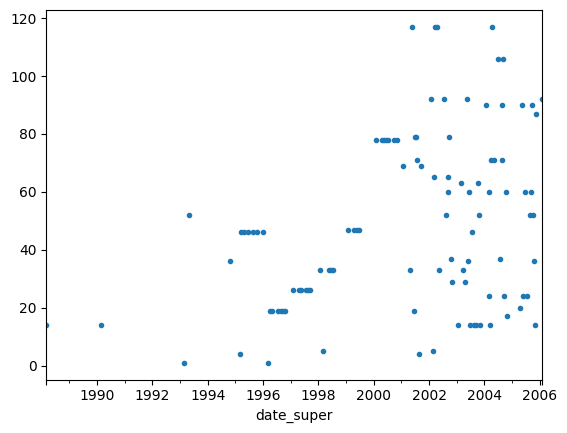

In [10]:
smp_org = walmart_store_count_series.plot(style='.')